# Coding Exercise #4 *Hermite-Gaussian Beams*

In this exercise, you will visualise Hermite_Gaussian (HG) beams and analyse their dependencies on various parameters.

HG beams are usually denoted $TEM_{m,n}$ where $TEM$ stands for Transverse Electromagnetic and $m,n$ are integers specifying the orders of the mode in the $x$ and $y$ directions transverse to the beam propagation direction, $z$.

Note that sometimes the commas between $m$ and $n$ are omitted, i.e. $TEM_{mn}$.

The **electric field** of the $TEM_{m,n}$ mode is given by the following somewhat intimidating formula:


##  $TEM_{mn}(x,y)=H_m\left(\frac{\sqrt 2 x}{w(z)}\right)H_n\left(\frac{\sqrt 2 y}{w(z)}\right)\exp\left(i(m+n)\arctan\left(\frac{z}{z_R}\right)\right)TEM_{00}$

where $H_n$(X) is the $n^{th}$ order Hermite polynomial, and $TEM_{0,0}$ is the lowest-order mode (often referred to as a *Gaussian Beam*), with **electric field** given by:

### $TEM_{00}(r=\sqrt{x^2+y^2}, z)=E_0\left(\frac{w_0}{w(z)}\right)\exp\left(\frac{-r^2}{w^2(z)}\right)\exp \left(-i k z - \frac{i k r^2}{2 R(z)} + \arctan \left(\frac{z}{z_R}\right)\right)$

where $k$ is the standard wavenumber of wave propagation and

$w(z) = w_0\sqrt{1+\left(\frac{z}{z_r}\right)^2}$ is the beam radius

$R(z) = z + \frac{z_R^2}{z}$ is the wavefront radius of curvature

$z_R = \frac{\pi w_0^2}{\lambda}$ is the *Rayleigh Range* which is a measure of the depth of focus

and 

$w_0 = w(0)$ is the *beam waist* which is the minimum beam radius, also known as the *spot radius*.

Though these formulae are a bit of a handful, they are relatively easy to model. Modelling is an excellent way of getting a physical feel for these functions.

# Coding Task

A HeNe laser ($\lambda=633\,$nm) with a TEM$_{00}$ mode has its beam waist ($w_0=0.5\,$mm) located at its output coupler.

### 4.1 Beams radius and area

a) Plot the beam waist radius as a function of distance $z$ away from the output coupler in the range 0-10 m, where $z=0$ coresponds to the position of the output coupler.

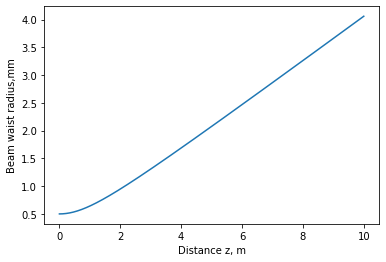

In [32]:
wavel=633e-9 #wavelength
w0=0.5e-3 #beam waist

import numpy as np
import matplotlib.pyplot as plt

z=np.linspace(0,10,1000) #in metres
def w(z):
    #returns beam radius at z
    return w0*np.sqrt(1+(z/zr(w0))**2)
def zr(w0):
    return np.pi*w0**2/wavel

#w0 at z=0, output coupler
plt.plot(z,w(z)*10**3)
plt.xlabel("Distance z, m")
plt.ylabel("Beam waist radius,mm")
    
plt.show()

b) Show that the beam radius asymptotically approaches $w_0 z/z_R$ as $z\rightarrow\infty$.

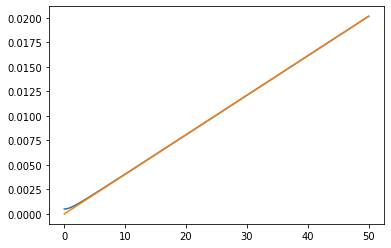

In [33]:
z2=np.linspace(0,50,1000)
def func(x):
    return w0*x/zr(w0)
plt.plot(z2,w(z2))
plt.plot(z2,func(z2))
plt.show()
#see a very good overlap

c) Convince yourself that the beam area has doubled after a distance $z_R$.

In [34]:
def area(x):
    return np.pi*w(x)**2
#at z=0:
print(area(0))
#at zr
print(area(zr(w0))/2)
#yes, agreement

7.853981633974482e-07
7.853981633974485e-07


d) The laser is pointed to the Moon. Estimate the beam size on the Moon's surface. What assumptions did you make?

In [36]:
#distance to the moon is 384400 km
print(w(384400000))
print(area(384400000))
#huge, radius 155 km 
#assumed nothing happening to the beam as it travels though the atmosphere and through space

154905.63343529624
75384888473.5403


### 4.2 Wavefront radius of curvature

a) Plot the wavefront radius of curvature over the same range as 4.1a).

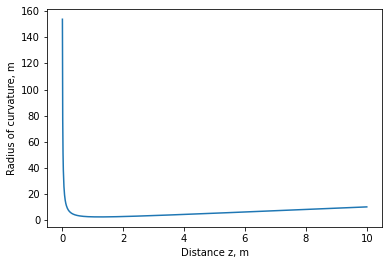

In [37]:
def rc(x):
    return x+zr(w0)**2/x
z=z[1:]#remove z=0 entry
plt.plot(z,rc(z))
plt.xlabel("Distance z, m")
plt.ylabel("Radius of curvature, m")
plt.show()

b) Convince yourself that the wavefront is plane (flat) at the beam waist.

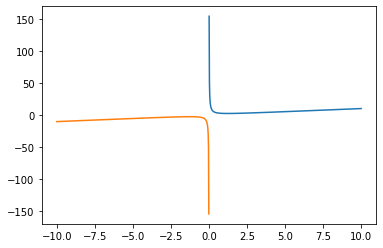

In [38]:
z3=np.append(-z,z)
plt.plot(z,rc(z))
plt.plot(-z,rc(-z))
plt.show()
#radius of curvature tends to +/- infinity at waist, so flat wavefront
  

c) Convince yourself that the wavefront is most curved at $z=z_R$.

In [39]:
print(z[np.argmin(rc(z))])
print(zr(w0))
#very close values

1.2412412412412412
1.2407553924130303


d) Show that far from the laser, the wavefront looks like a section of a wavefront from a point-source located at the waist.

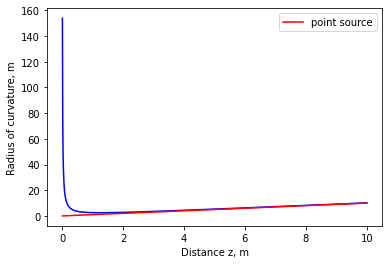

In [40]:
#from point source, would get spherical wavefronts
#so rc, radius of curvature, =r
plt.plot(z,rc(z), color="blue")
plt.xlabel("Distance z, m")
plt.ylabel("Radius of curvature, m")
plt.plot(z,z, label="point source", color="red")
plt.legend()
plt.show()
#yes, agreement far from the laser

### 4.3 Intensity

For these questions, you will need to use the formula given above for the electric field $TEM_{mn}$.

a) Plot the normalised beam intensity (i.e. max intensity = 1) as a function of $z$ on the beam axis, i.e. for $r=0$.

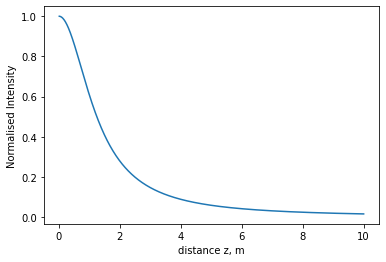

In [41]:
from scipy.special import hermite
k=2*np.pi/wavel

def I(z):
    return I0*(w0/w(z))**2

I0=1
plt.plot(z,I(z))
plt.xlabel("distance z, m")
plt.ylabel("Normalised Intensity")
plt.show()

b) Plot the normalised beam intensity as a function of $r$ at the beam waist and at $z=1\,$m. Convince yourself that the width of the intensity distributions at the $1/e^2$ height is $w(z)$.

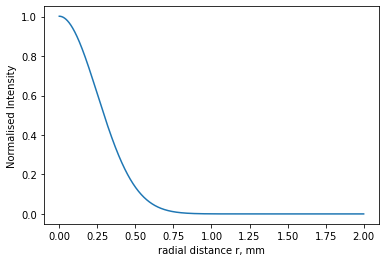

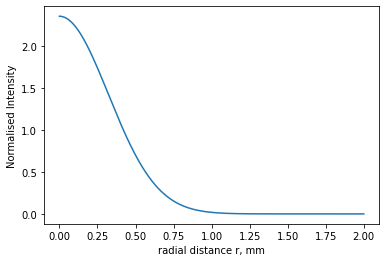

0.0005005005005005005 0.0005000001623931086
0.0006426426426426426 0.0006421784292623498


In [111]:
def TEM_mn(m,n,x,y,z,E0):
    Hn=hermite(n)
    Hm=hermite(m)
    
    TEM00=E0*(w0/w(z))*np.exp(-(x**2+y**2)/w(z)**2)*np.exp(-1J*k*z-1J*k*(x**2+y**2)/(2*rc(z))+np.arctan(z/zr(w0)))
    if n==m==0:
        return TEM00
    else:
        TEM_mn=Hm(np.sqrt(2)*x/w(z))*Hn(np.sqrt(2)*y/w(z))*np.exp(1J*(m+n)*np.arctan(z/zr(w0)))*TEM00
        return TEM_mn
#at waist, z=0
r=np.linspace(0,0.002,1000)
x=r
y=0
z=0.001
E0=1
E00=TEM_mn(0,0,x,y,z,E0)
I001=np.abs(E00**2)
plt.plot(r*10**3,I001)
plt.xlabel("radial distance r, mm")
plt.ylabel("Normalised Intensity")
plt.show()

#at z=1m
z=1
E00=TEM_mn(0,0,x,y,z,E0)
I002=np.abs(E00**2)
plt.plot(r*10**3,I002)
plt.xlabel("radial distance r, mm")
plt.ylabel("Normalised Intensity")
plt.show()

def width(x,y):
    return x[np.where(y<(y[0]/np.e**2))[0][0]]
print(width(r,I001),w(0.001))
print(width(r,I002),w(1))
#yes, agreement

c) Plot a heatmap of $I(x,y)$ for $z=0$ and for $z=1\,$m.

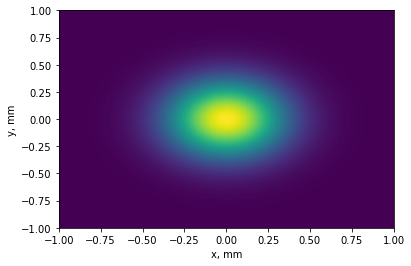

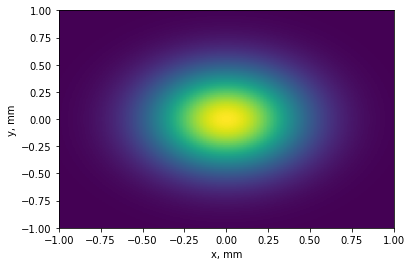

In [120]:
x=np.linspace(-0.001,0.001,100)
y=np.linspace(-0.001,0.001,100)

#z=0.001
z=0.001
E0=1
I_xy=np.zeros((len(x),len(y)))
for i in range(len(x)):
    for j in range(len(y)):
        E00=TEM_mn(0,0,x[i],y[j],z,E0)
        I_xy[i][j]=np.abs(E00**2)
plt.imshow(I_xy,origin="lower",aspect="auto",extent=(np.amin(x)*10**3, np.amax(x)*10**3,np.amin(y)*10**3, np.amax(y)*10**3))
plt.xlabel("x, mm")
plt.ylabel("y, mm")
plt.show()

#z=1
z=1
E0=1
I_xy=np.zeros((len(x),len(y)))
for i in range(len(x)):
    for j in range(len(y)):
        E00=TEM_mn(0,0,x[i],y[j],z,E0)
        I_xy[i][j]=np.abs(E00**2)

plt.imshow(I_xy,origin="lower",aspect="auto",extent=(np.amin(x)*10**3, np.amax(x)*10**3,np.amin(y)*10**3, np.amax(y)*10**3))
plt.xlabel("x, mm")
plt.ylabel("y, mm")
plt.show()

### 4.4 Higher-Order Modes

Due to a misalignment, the HeNe mode changes to $TEM_{21}$.

a) Repeat 4.3a).

b) Repeat 4.3b).

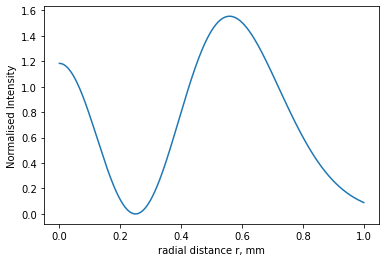

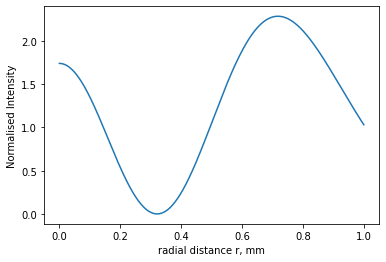

0.00019019019019019017 0.0005000001623931086
0.0002442442442442442 0.0006421784292623498


In [113]:
#at waist, z=0
r=np.linspace(0,0.001,1000)
x=r
y=0.0001
z=0.001
E0=1
E00=TEM_mn(2,1,x,y,z,E0)
#print(E00)
I001=np.abs(E00**2)
plt.plot(r*10**3,I001)
plt.xlabel("radial distance r, mm")
plt.ylabel("Normalised Intensity")
plt.show()

#at z=1m
z=1
E00=TEM_mn(2,1,x,y,z,E0)
I002=np.abs(E00**2)
plt.plot(r*10**3,I002)
plt.xlabel("radial distance r, mm")
plt.ylabel("Normalised Intensity")
plt.show()

def width(x,y):
    return x[np.where(y<(y[0]/np.e**2))[0][0]]
print(width(r,I001),w(0.001))
print(width(r,I002),w(1))
#widths dont match because of multiple peaks

c) Repeat 4.3c).

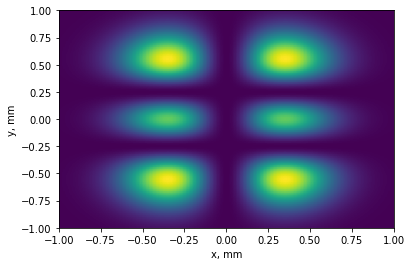

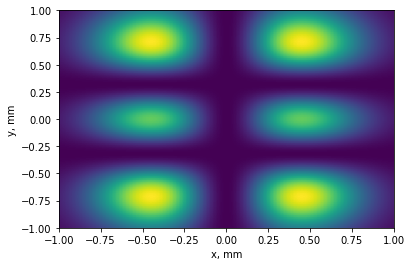

In [118]:
x=np.linspace(-0.001,0.001,100)
y=np.linspace(-0.001,0.001,100)

#z=0.001
z=0.001
E0=1
I_xy=np.zeros((len(x),len(y)))
for i in range(len(x)):
    for j in range(len(y)):
        E00=TEM_mn(2,1,x[i],y[j],z,E0)
        I_xy[i][j]=np.abs(E00**2)
plt.imshow(I_xy,origin="lower",aspect="auto",extent=(np.amin(x)*10**3, np.amax(x)*10**3,np.amin(y)*10**3, np.amax(y)*10**3))
plt.xlabel("x, mm")
plt.ylabel("y, mm")
plt.show()

#z=1
z=1
E0=1
I_xy=np.zeros((len(x),len(y)))
for i in range(len(x)):
    for j in range(len(y)):
        E00=TEM_mn(2,1,x[i],y[j],z,E0)
        I_xy[i][j]=np.abs(E00**2)

plt.imshow(I_xy,origin="lower",aspect="auto",extent=(np.amin(x)*10**3, np.amax(x)*10**3,np.amin(y)*10**3, np.amax(y)*10**3))
plt.xlabel("x, mm")
plt.ylabel("y, mm")
plt.show()

d) How do the $m, n$ value relate to the beam structure horizontally and vertically. Test your prediction with some other $m, n$ values.

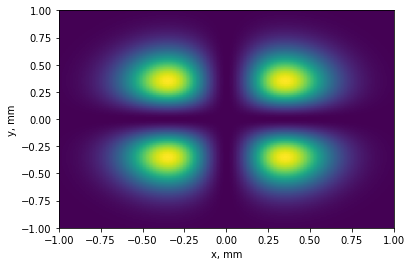

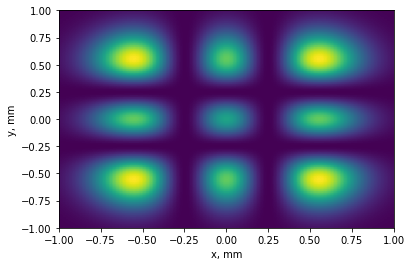

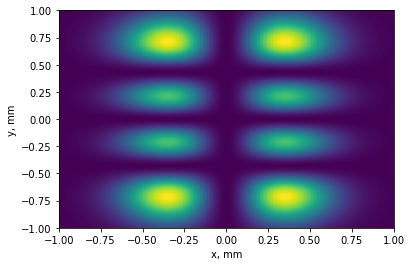

In [121]:
#z=0.001
z=0.001
E0=1
I_xy=np.zeros((len(x),len(y)))
for i in range(len(x)):
    for j in range(len(y)):
        E00=TEM_mn(1,1,x[i],y[j],z,E0)
        I_xy[i][j]=np.abs(E00**2)
plt.imshow(I_xy,origin="lower",aspect="auto",extent=(np.amin(x)*10**3, np.amax(x)*10**3,np.amin(y)*10**3, np.amax(y)*10**3))
plt.xlabel("x, mm")
plt.ylabel("y, mm")
plt.show()


I_xy=np.zeros((len(x),len(y)))
for i in range(len(x)):
    for j in range(len(y)):
        E00=TEM_mn(2,2,x[i],y[j],z,E0)
        I_xy[i][j]=np.abs(E00**2)
plt.imshow(I_xy,origin="lower",aspect="auto",extent=(np.amin(x)*10**3, np.amax(x)*10**3,np.amin(y)*10**3, np.amax(y)*10**3))
plt.xlabel("x, mm")
plt.ylabel("y, mm")
plt.show()


I_xy=np.zeros((len(x),len(y)))
for i in range(len(x)):
    for j in range(len(y)):
        E00=TEM_mn(3,1,x[i],y[j],z,E0)
        I_xy[i][j]=np.abs(E00**2)
plt.imshow(I_xy,origin="lower",aspect="auto",extent=(np.amin(x)*10**3, np.amax(x)*10**3,np.amin(y)*10**3, np.amax(y)*10**3))
plt.xlabel("x, mm")
plt.ylabel("y, mm")
plt.show()



### 4.5 Extension: Intensity Contours

a) For a general $TEM_{00}$ mode make a contour plot of the unit-normalisd intensity over $(r,z)$ for $r/w_0$ in the range 0 to 4, and $z/z_R$ in the range -2 to 2. 

b) Estimate the volume bounded by the contour $I=0.5$, i.e. the volume within which the beam intensity is greater than or equal to half its maximum value.